# Analysing Survival on the Titanic

This notebook focuses on exploring the Titanic dataset to uncover patterns and insights that influenced passenger survival.

## 🎯 Objectives
- Understand the dataset structure and clean missing values.  
- Explore survival patterns based on demographics (Age, Sex, Family size).  
- Analyse the effect of socio-economic status (Passenger class, Fare).  
- Investigate geographical aspects (Port of Embarkation).  

## 📊 Dataset Overview
The dataset contains information about passengers aboard the Titanic, including:  
- **Demographics:** Age, Sex  
- **Family context:** Number of siblings/spouses (SibSp), number of parents/children (Parch)  
- **Socio-economic factors:** Passenger class (Pclass), Ticket price (Fare), Cabin (if available)  
- **Travel details:** Ticket number, Port of embarkation (Embarked)  
- **Outcome:** Survival status (0 = did not survive, 1 = survived)  

By analysing this data, we aim to uncover key insights into survival patterns and develop a predictive understanding of who had better chances of survival.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data analysis packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Get Data
# !git clone http://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset.git

# 1. Data Inspection

In [4]:
titanic_df = pd.read_csv("E:/AI_DS_Journey/gfg_21projects_21days/21-Days-21-Projects-Dataset/Datasets/Titanic-Dataset.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic_df.shape

(891, 12)

Titanic Dataset consists of 891 rows and 12 columns

In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We have ~39% of passengers survived

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Missing values in Age, Cabin and Embarked columns, More in Cabin & Age columns

# 2. Data Cleaning

In [8]:
titanic_df["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [12]:
print("Missing values before cleaning: ")
titanic_df.isna().sum()

Missing values before cleaning: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
median_age = titanic_df['Age'].median()
median_age

titanic_df['Age'] = titanic_df['Age'].fillna(median_age)

In [ ]:
mode_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(mode_embarked)

Missing values after Embarked cleaning:
Age           0
Embarked      0
Cabin       687
dtype: int64


**Handling the Cabin Column**

Since the Cabin column has ~77% missing values, imputing isn’t reliable. Instead, I will create a new feature Has_Cabin (1 if a cabin is recorded, 0 otherwise). I’ll then compare survival rates for both groups and decide whether to keep this feature or drop it.

In [18]:
titanic_df['Has_Cabin'] = titanic_df['Cabin'].notna().astype(int)
titanic_df.drop('Cabin', axis=1, inplace=True)

In [21]:
print("Missing values after cleaning: ")
titanic_df.isna().sum()

Missing values after cleaning: 


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

# 3. EDA

***Univariate Analysis***

look at each column individually → distributions, categories. This builds the foundation before moving to relationships.
Visualising the data(Packages used: **Seaborn** & **Matplotlib**)
- For **Categorical Variables**: 
    - More than 5 categories: Countplot / Barplot, 
    - Less than 5 categories: Pie chart -> Show frequency distribution & class imbalance

- For **Numerical Vaiables**:
    - Continuous Data -Histogram, KDE plot, Boxplot
Shape of data, central tendency, outliers
    - Discrete Data -Countplot / Bar chart
Distribution of integer counts

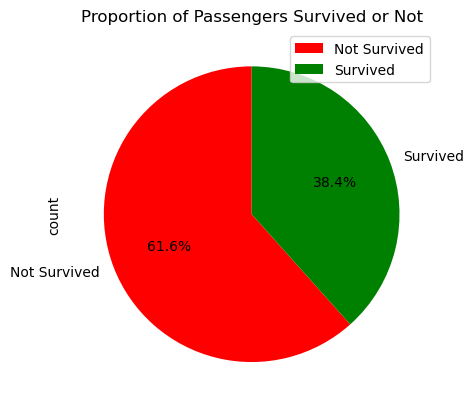

In [44]:
import matplotlib.pyplot as plt

# Create a pie chart with labels
titanic_df['Survived'].value_counts().plot.pie(
    labels=['Not Survived', 'Survived'],  # 0 → Not Survived, 1 → Survived
    autopct='%1.1f%%', startangle=90, colors=['red', 'green']
)

plt.title("Proportion of Passengers Survived or Not")
plt.legend(["Not Survived", "Survived"], loc="best")
plt.show()


~62% of people didnot survived

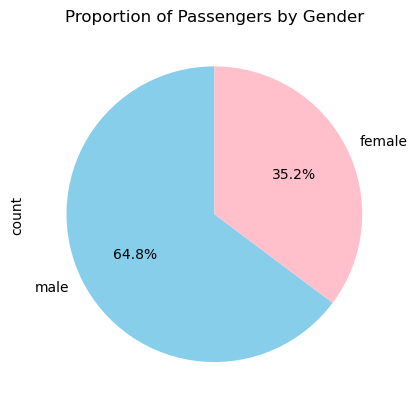

In [41]:
titanic_df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink',])
plt.title("Proportion of Passengers by Gender")
plt.show()

~65% passengers are males & ~35% are females

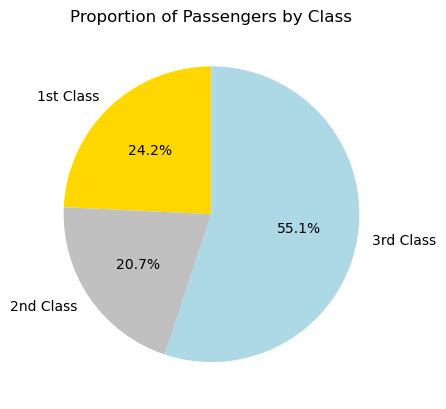

In [ ]:
import matplotlib.pyplot as plt

# Count Pclass values in the order 1, 2, 3
pclass_counts = titanic_df['Pclass'].value_counts().sort_index()  # ensures order 1,2,3

# Pie chart
pclass_counts.plot.pie(
    labels=['1st Class', '2nd Class', '3rd Class'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['gold', 'silver', 'lightblue']
)

plt.title("Proportion of Passengers by Class")
plt.show()


3rd Class passengers are more when compared to 1st and 2nd classes

In [ ]:
titanic_df